In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import src.data_handler as data_handler
import src.models as models
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))

CANTIDAD_DE_CLASES = 48
SEED = 42

X_images : np.ndarray[float] = np.load(f"{project_root}/TP03/data/X_images.npy")
y_images : np.ndarray[float] = np.load(f"{project_root}/TP03/data/y_images.npy")

np.random.seed(SEED)

In [2]:
y_images = np.array([[0 if y_images[x] != i else 1 for i in range(CANTIDAD_DE_CLASES)] for x in range(len(X_images))], dtype=float)
X_images = X_images / 255
X_train : pd.DataFrame
X_validation : pd.DataFrame
X_test : pd.DataFrame
X_train, X_validation, X_test, Y_train, Y_validation, Y_test = data_handler.get_splitted_dataset(pd.DataFrame(X_images), pd.DataFrame(y_images), seed=SEED)

## 3 ) Implementación y Entrenamiento de una Red Neuronal Avanzada

In [3]:
# Pruebo diferentes batch sizes
# for i in range(4, 11, 1):
#     print(f"\nBATCH SIZE = 2^{i}")
#     M1_batch_sizes : models.RedNeuronal = models.RedNeuronal([784,100,80,48], ['relu', 'relu', 'softmax'])
#     M1_batch_sizes.stochastic_gradient_descent(
#         np.array(X_train), 
#         np.array(Y_train),
#         epochs=250, 
#         learning_rate=[0.0001, 0.0001], 
#         batch_size_2_pow=i, 
#         print_results_rate=125
#     )

# output

# BATCH SIZE = 2^4
# Epoch 125
# -> Loss Mean = 1.4172952929689673
# Epoch 250
# -> Loss Mean = 3.872721248866749
# -> Difference = +2.4554259558977813

# BATCH SIZE = 2^5
# Epoch 125
# -> Loss Mean = 2.068959884185001
# Epoch 250
# -> Loss Mean = 3.852873102551695
# -> Difference = +1.7839132183666937

# BATCH SIZE = 2^6
# Epoch 125
# -> Loss Mean = 1.503137802246227
# Epoch 250
# -> Loss Mean = 3.8621948632425784
# -> Difference = +2.3590570609963515

# BATCH SIZE = 2^7
# Epoch 125
# -> Loss Mean = 1.1309850462552273
# Epoch 250
# -> Loss Mean = 3.8645668214647095
# -> Difference = +2.7335817752094824

# BATCH SIZE = 2^8
# Epoch 125
# -> Loss Mean = 1.5913105224784112
# Epoch 250
# -> Loss Mean = 4.343482088518529
# -> Difference = +2.752171566040118

# BATCH SIZE = 2^9
# Epoch 125
# -> Loss Mean = 1.237209996813813
# Epoch 250
# -> Loss Mean = 3.124517962619984
# -> Difference = +1.887307965806171

# BATCH SIZE = 2^10
# Epoch 125
# -> Loss Mean = 1.1415337620477084
# Epoch 250
# -> Loss Mean = 0.9448982327931914
# -> Difference = -0.196635529254517


# Mejores valores:
# -> 7
# -> 8
# -> 9
# -> 10

In [4]:
# Pruebo diferentes K (Rate Schedule Lineal)
# for i in np.arange(1, 8.5, 0.5):
#     print(f"\nK = epochs / {i} = {int(round(250/i))}")
#     M1_rs_lineal : models.RedNeuronal = models.RedNeuronal([784,100,80,48], ['relu', 'relu', 'softmax'])
#     M1_rs_lineal.stochastic_gradient_descent(
#         np.array(X_train), 
#         np.array(Y_train),
#         epochs=250, 
#         learning_rate=[0.0001, 0.00001], 
#         batch_size_2_pow=10, 
#         K=int(round(250/i)),
#         print_results_rate=125
#     )

# outputs

# K = epochs / 1.0 = 250
# Epoch 125
# -> Loss Mean = 1.2315667779944102
# Epoch 250
# -> Loss Mean = 0.9282257182237148
# -> Difference = -0.30334105977069536

# K = epochs / 1.5 = 167
# Epoch 125
# -> Loss Mean = 1.3457219686135664
# Epoch 250
# -> Loss Mean = 1.18082896379247
# -> Difference = -0.16489300482109637

# K = epochs / 2.0 = 125
# Epoch 125
# -> Loss Mean = 1.5599001239326573
# Epoch 250
# -> Loss Mean = 1.402887814776599
# -> Difference = -0.15701230915605824

# K = epochs / 2.5 = 100
# Epoch 125
# -> Loss Mean = 1.731865305547131
# Epoch 250
# -> Loss Mean = 1.5258190848871978
# -> Difference = -0.20604622065993317

# K = epochs / 3.0 = 83
# Epoch 125
# -> Loss Mean = 1.8668644240816181
# Epoch 250
# -> Loss Mean = 1.6246906793329419
# -> Difference = -0.24217374474867626

# K = epochs / 3.5 = 71
# Epoch 125
# -> Loss Mean = 2.028664632482819
# Epoch 250
# -> Loss Mean = 1.7096246003050268
# -> Difference = -0.3190400321777922

# K = epochs / 4.0 = 62
# Epoch 125
# -> Loss Mean = 2.193718177981163
# Epoch 250
# -> Loss Mean = 1.8334227580855653
# -> Difference = -0.3602954198955979

# K = epochs / 4.5 = 56
# Epoch 125
# -> Loss Mean = 2.3154135465234127
# Epoch 250
# -> Loss Mean = 1.882055754810544
# -> Difference = -0.4333577917128686

# K = epochs / 5.0 = 50
# Epoch 125
# -> Loss Mean = 2.4534161910034094
# Epoch 250
# -> Loss Mean = 1.997947726239879
# -> Difference = -0.4554684647635303

# K = epochs / 5.5 = 45
# Epoch 125
# -> Loss Mean = 2.4208210545797697
# Epoch 250
# -> Loss Mean = 1.9626379885146958
# -> Difference = -0.45818306606507386

# K = epochs / 6.0 = 42
# Epoch 125
# -> Loss Mean = 2.5536363593431286
# Epoch 250
# -> Loss Mean = 2.0566346996991447
# -> Difference = -0.4970016596439839

# K = epochs / 6.5 = 38
# Epoch 125
# -> Loss Mean = 2.4199395417680583
# Epoch 250
# -> Loss Mean = 1.982755603538604
# -> Difference = -0.4371839382294542

# K = epochs / 7.0 = 36
# Epoch 125
# -> Loss Mean = 2.591578743678074
# Epoch 250
# -> Loss Mean = 2.0582109992993223
# -> Difference = -0.5333677443787517

# K = epochs / 7.5 = 33
# Epoch 125
# -> Loss Mean = 2.8145412582937697
# Epoch 250
# -> Loss Mean = 2.2594012716020897
# -> Difference = -0.55513998669168

# K = epochs / 8.0 = 31
# Epoch 125
# -> Loss Mean = 2.7476434093148048
# Epoch 250
# -> Loss Mean = 2.1596900099530254
# -> Difference = -0.5879533993617794


# Mejores Valores:
# -> K = epochs / 1.0
# -> K = epochs / 1.5
# -> K = epochs / 7.5
# -> K = epochs / 8.0
# La diferencia de Loss entre épocas es mayor a medida se aumenta K

In [5]:
# Pruebo diferentes S (Rate Schedule Exponencial)
# con c = -0.5
# for i in np.arange(1, 8.5, 0.5):
#     print(f"\nS = epochs / {i}")
#     M1_rs_lineal : models.RedNeuronal = models.RedNeuronal([784,100,80,48], ['relu', 'relu', 'softmax'])
#     M1_rs_lineal.stochastic_gradient_descent(
#         np.array(X_train), 
#         np.array(Y_train),
#         epochs=250, 
#         learning_rate=[0.0001, 0.00001], 
#         batch_size_2_pow=10, 
#         S = 250 / i,
#         c = -0.5,
#         print_results_rate=125
#     )

# outputs

# S = epochs / 1.0
# Epoch 125
# -> Loss Mean = 1.2315667779944102
# Epoch 250
# -> Loss Mean = 0.9282257182237149
# -> Difference = -0.30334105977069525

# S = epochs / 1.5
# Epoch 125
# -> Loss Mean = 1.2279800986162261
# Epoch 250
# -> Loss Mean = 0.934442884522318
# -> Difference = -0.2935372140939081

# S = epochs / 2.0
# Epoch 125
# -> Loss Mean = 1.27159213924753
# Epoch 250
# -> Loss Mean = 0.9733160030805783
# -> Difference = -0.2982761361669517

# S = epochs / 2.5
# Epoch 125
# -> Loss Mean = 1.2561138691269322
# Epoch 250
# -> Loss Mean = 0.9592860523539999
# -> Difference = -0.29682781677293235

# S = epochs / 3.0
# Epoch 125
# -> Loss Mean = 1.254764903238054
# Epoch 250
# -> Loss Mean = 0.9703015449309709
# -> Difference = -0.284463358307083

# S = epochs / 3.5
# Epoch 125
# -> Loss Mean = 1.2392888075717492
# Epoch 250
# -> Loss Mean = 0.9572990855764858
# -> Difference = -0.2819897219952634

# S = epochs / 4.0
# Epoch 125
# -> Loss Mean = 1.2396458694007957
# Epoch 250
# -> Loss Mean = 0.9494928606444151
# -> Difference = -0.2901530087563806

# S = epochs / 4.5
# Epoch 125
# -> Loss Mean = 1.2182932524777628
# Epoch 250
# -> Loss Mean = 0.9143984963273055
# -> Difference = -0.30389475615045725

# S = epochs / 5.0
# Epoch 125
# -> Loss Mean = 1.2660397495247033
# Epoch 250
# -> Loss Mean = 0.9607409005321466
# -> Difference = -0.30529884899255677

# S = epochs / 5.5
# Epoch 125
# -> Loss Mean = 1.231261411530577
# Epoch 250
# -> Loss Mean = 0.9455057707748208
# -> Difference = -0.2857556407557563

# S = epochs / 6.0
# Epoch 125
# -> Loss Mean = 1.2662249524660232
# Epoch 250
# -> Loss Mean = 0.9660696978410621
# -> Difference = -0.30015525462496107

# S = epochs / 6.5
# Epoch 125
# -> Loss Mean = 1.2266666745874328
# Epoch 250
# -> Loss Mean = 0.9417029115538114
# -> Difference = -0.2849637630336215

# S = epochs / 7.0
# Epoch 125
# -> Loss Mean = 1.2318325649500805
# Epoch 250
# -> Loss Mean = 0.9540861023732001
# -> Difference = -0.2777464625768804

# S = epochs / 7.5
# Epoch 125
# -> Loss Mean = 1.23548550539208
# Epoch 250
# -> Loss Mean = 0.9268702820964739
# -> Difference = -0.308615223295606

# S = epochs / 8.0
# Epoch 125
# -> Loss Mean = 1.2184017920804486
# Epoch 250
# -> Loss Mean = 0.9384180833074381
# -> Difference = -0.2799837087730105


# Mejores valores:
# -> S = epochs / 1.0
# -> S = epochs / 4.5
# -> S = epochs / 8.0
# -> S = epochs / 7.5

In [6]:
# Pruebo diferentes combinaciones de B1 y B2 (Adam)
# valores comunes para parámetros de Adam:
# b1 = [0.85, 0.9, 0.95]
# b2 = [0.95, 0.99, 0.999]
# for b1 in [0.8, 0.85, 0.9, 0.95, 0.99, 0.999]:
#     for b2 in [0.8, 0.85, 0.9, 0.95, 0.99, 0.999]:
#         print(f"\nB1 = {b1}")
#         print(f"B2 = {b2}")
#         M1_rs_lineal : models.RedNeuronal = models.RedNeuronal([784,100,80,48], ['relu', 'relu', 'softmax'])
#         M1_rs_lineal.stochastic_gradient_descent(
#             np.array(X_train), 
#             np.array(Y_train),
#             epochs=250, 
#             learning_rate=[0.0001, 0.0001], 
#             batch_size_2_pow=10, 
#             use_adam=True,
#             b1=b1,
#             b2=b2,
#             print_results_rate=125
#         )

# B1 = 0.8
# B2 = 0.8
# Epoch 125
# -> Loss Mean = 1.7772490205564546
# Epoch 250
# -> Loss Mean = 0.9639208596747603
# -> Difference = -0.8133281608816944

# B1 = 0.8
# B2 = 0.85
# Epoch 125
# -> Loss Mean = 1.7983328000649013
# Epoch 250
# -> Loss Mean = 0.9838414169872784
# -> Difference = -0.8144913830776228

# B1 = 0.8
# B2 = 0.9
# Epoch 125
# -> Loss Mean = 1.7607794740484755
# Epoch 250
# -> Loss Mean = 0.9893162812603814
# -> Difference = -0.771463192788094

# B1 = 0.8
# B2 = 0.95
# Epoch 125
# -> Loss Mean = 1.8052086836089671
# Epoch 250
# -> Loss Mean = 1.001376278851238
# -> Difference = -0.8038324047577292

# B1 = 0.8
# B2 = 0.99
# Epoch 125
# -> Loss Mean = 1.9510067638275015
# Epoch 250
# -> Loss Mean = 1.1222462163537101
# -> Difference = -0.8287605474737914

# B1 = 0.8
# B2 = 0.999
# Epoch 125
# -> Loss Mean = 2.162745869801885
# Epoch 250
# -> Loss Mean = 1.3225639985527846
# -> Difference = -0.8401818712491003

# B1 = 0.85
# B2 = 0.8
# Epoch 125
# -> Loss Mean = 1.7999609420546678
# Epoch 250
# -> Loss Mean = 0.9977574691931932
# -> Difference = -0.8022034728614746

# B1 = 0.85
# B2 = 0.85
# Epoch 125
# -> Loss Mean = 1.798068963360069
# Epoch 250
# -> Loss Mean = 0.9548216146609436
# -> Difference = -0.8432473486991254

# B1 = 0.85
# B2 = 0.9
# Epoch 125
# -> Loss Mean = 1.8159731602463947
# Epoch 250
# -> Loss Mean = 1.0158137090153114
# -> Difference = -0.8001594512310832

# B1 = 0.85
# B2 = 0.95
# Epoch 125
# -> Loss Mean = 1.8163240591156158
# Epoch 250
# -> Loss Mean = 1.0149400954495191
# -> Difference = -0.8013839636660967

# B1 = 0.85
# B2 = 0.99
# Epoch 125
# -> Loss Mean = 2.000600466751602
# Epoch 250
# -> Loss Mean = 1.1251001938259066
# -> Difference = -0.8755002729256955

# B1 = 0.85
# B2 = 0.999
# Epoch 125
# -> Loss Mean = 2.078086135678435
# Epoch 250
# -> Loss Mean = 1.3342131161697164
# -> Difference = -0.7438730195087186

# B1 = 0.9
# B2 = 0.8
# Epoch 125
# -> Loss Mean = 1.7053035881717984
# Epoch 250
# -> Loss Mean = 0.9601541105674611
# -> Difference = -0.7451494776043373

# B1 = 0.9
# B2 = 0.85
# Epoch 125
# -> Loss Mean = 1.7979887343348615
# Epoch 250
# -> Loss Mean = 0.9719501225201559
# -> Difference = -0.8260386118147056

# B1 = 0.9
# B2 = 0.9
# Epoch 125
# -> Loss Mean = 1.747080045171262
# Epoch 250
# -> Loss Mean = 0.9923929049795421
# -> Difference = -0.7546871401917199

# B1 = 0.9
# B2 = 0.95
# Epoch 125
# -> Loss Mean = 1.7713394597958545
# Epoch 250
# -> Loss Mean = 0.9932174300782322
# -> Difference = -0.7781220297176223

# B1 = 0.9
# B2 = 0.99
# Epoch 125
# -> Loss Mean = 1.9661058428118556
# Epoch 250
# -> Loss Mean = 1.1222052547226222
# -> Difference = -0.8439005880892334

# B1 = 0.9
# B2 = 0.999
# Epoch 125
# -> Loss Mean = 2.1198485219230068
# Epoch 250
# -> Loss Mean = 1.3143973380613372
# -> Difference = -0.8054511838616696

# B1 = 0.95
# B2 = 0.8
# Epoch 125
# -> Loss Mean = 1.7359165937813512
# Epoch 250
# -> Loss Mean = 0.9822689844351626
# -> Difference = -0.7536476093461886

# B1 = 0.95
# B2 = 0.85
# Epoch 125
# -> Loss Mean = 1.7439409260045875
# Epoch 250
# -> Loss Mean = 1.0122078843606628
# -> Difference = -0.7317330416439247

# B1 = 0.95
# B2 = 0.9
# Epoch 125
# -> Loss Mean = 1.7420183818955586
# Epoch 250
# -> Loss Mean = 0.9713205953858455
# -> Difference = -0.7706977865097131

# B1 = 0.95
# B2 = 0.95
# Epoch 125
# -> Loss Mean = 1.713992644969066
# Epoch 250
# -> Loss Mean = 0.955531323085762
# -> Difference = -0.7584613218833038

# B1 = 0.95
# B2 = 0.99
# Epoch 125
# -> Loss Mean = 1.9823285772161083
# Epoch 250
# -> Loss Mean = 1.1141049453740333
# -> Difference = -0.8682236318420751

# B1 = 0.95
# B2 = 0.999
# Epoch 125
# -> Loss Mean = 2.0584884572132047
# Epoch 250
# -> Loss Mean = 1.3331926942923464
# -> Difference = -0.7252957629208583

# B1 = 0.99
# B2 = 0.8
# Epoch 125
# -> Loss Mean = 1.9194829327123957
# Epoch 250
# -> Loss Mean = 22.12640362799161
# -> Difference = +20.206920695279216

# B1 = 0.99
# B2 = 0.85
# Epoch 125
# -> Loss Mean = 1.753760525407771
# Epoch 250
# -> Loss Mean = 1.1444816278394123
# -> Difference = -0.6092788975683587

# B1 = 0.99
# B2 = 0.9
# Epoch 125
# -> Loss Mean = 1.7613764139245738
# Epoch 250
# -> Loss Mean = 1.1592166088031157
# -> Difference = -0.6021598051214581

# B1 = 0.99
# B2 = 0.95
# Epoch 125
# -> Loss Mean = 1.5711968091365154
# Epoch 250
# -> Loss Mean = 0.9890369904033487
# -> Difference = -0.5821598187331667

# B1 = 0.99
# B2 = 0.99
# Epoch 125
# -> Loss Mean = 1.6961132465457276
# Epoch 250
# -> Loss Mean = 0.9941542919174201
# -> Difference = -0.7019589546283075

# B1 = 0.99
# B2 = 0.999
# Epoch 125
# -> Loss Mean = 1.827154957442074
# Epoch 250
# -> Loss Mean = 1.2084058959905646
# -> Difference = -0.6187490614515094

# B1 = 0.999
# B2 = 0.8
# Epoch 125
# -> Loss Mean = 22.009892572040744
# Epoch 250
# -> Loss Mean = 22.058945080345595
# -> Difference = +0.049052508304850306

# B1 = 0.999
# B2 = 0.85
# Epoch 125
# -> Loss Mean = 2.067561520696059
# Epoch 250
# -> Loss Mean = 6.878628816964356
# -> Difference = +4.8110672962682965

# B1 = 0.999
# B2 = 0.9
# Epoch 125
# -> Loss Mean = 2.0831593557943204
# Epoch 250
# -> Loss Mean = 2.5461054926145916
# -> Difference = +0.4629461368202712

# B1 = 0.999
# B2 = 0.95
# Epoch 125
# -> Loss Mean = 1.800115137420336
# Epoch 250
# -> Loss Mean = 1.4678725883521437
# -> Difference = -0.3322425490681922

# B1 = 0.999
# B2 = 0.99
# Epoch 125
# -> Loss Mean = 1.6069005465455553
# Epoch 250
# -> Loss Mean = 0.9377605121728853
# -> Difference = -0.66914003437267

# B1 = 0.999
# B2 = 0.999
# Epoch 125
# -> Loss Mean = 1.6909541426207872
# Epoch 250
# -> Loss Mean = 1.0714718472439175
# -> Difference = -0.6194822953768697

# Mejores valores:
# -> B1 = 0.999
#    B2 = 0.99
# -> B1 = 0.85
#    B2 = 0.85
# -> B1 = 0.95
#    B2 = 0.95
# -> B1 = 0.9
#    B2 = 0.88

In [ ]:
# Pruebo diferentes L2 (Regularización L2)
# for l2_exp in range(3, -6, -1):
#     print(f"\nL2 = {10**l2_exp}")
#     M1 : models.RedNeuronal = models.RedNeuronal([784,100,80,48], ['relu', 'relu', 'softmax'])
#     M1.stochastic_gradient_descent(
#         np.array(X_train), 
#         np.array(Y_train),
#         epochs=250, 
#         learning_rate=[0.0001, 0.0001], 
#         batch_size_2_pow=10, 
#         L2=10**l2_exp,
#         print_results_rate=125
#     )

# output:

# L2 = 1000
# Epoch 125
# -> Loss Mean = 3.529896700969622
# Epoch 250
# -> Loss Mean = 3.154754735208252
# -> Difference = -0.3751419657613697

# L2 = 100
# Epoch 125
# -> Loss Mean = 1.8320888855557524
# Epoch 250
# -> Loss Mean = 1.4721796749388958
# -> Difference = -0.35990921061685666

# L2 = 10
# Epoch 125
# -> Loss Mean = 1.2211964751367268
# Epoch 250
# -> Loss Mean = 0.9547285923058941
# -> Difference = -0.26646788283083267

# L2 = 1
# Epoch 125
# -> Loss Mean = 1.1679356882332232
# Epoch 250
# -> Loss Mean = 0.8247530396746727
# -> Difference = -0.3431826485585505

# L2 = 0.1
# Epoch 125
# -> Loss Mean = 1.1220241383402538
# Epoch 250
# -> Loss Mean = 1.36359759909518
# -> Difference = +0.24157346075492625

# L2 = 0.01
# Epoch 125
# -> Loss Mean = 1.1006828117873595
# Epoch 250
# -> Loss Mean = 1.1026206058737746
# -> Difference = +0.0019377940864151455

# L2 = 0.001
# Epoch 125
# -> Loss Mean = 1.1423622218425207
# Epoch 250
# -> Loss Mean = 1.2426144683853708
# -> Difference = +0.10025224654285014

# L2 = 0.0001
# Epoch 125
# -> Loss Mean = 1.060911088368837
# Epoch 250
# -> Loss Mean = 1.0485479311999377
# -> Difference = -0.012363157168899352

# L2 = 1e-05
# Epoch 125
# -> Loss Mean = 1.1213377292808744
# Epoch 250
# -> Loss Mean = 0.8520883823783536
# -> Difference = -0.2692493469025208


# Mejores valores:
# -> 0.00001
# -> 0.0001
# -> 1
# -> 10

## Cross-Validation

In [8]:
X_train, X_test, Y_train, Y_test = data_handler.get_train_and_test_split(pd.DataFrame(X_images), pd.DataFrame(y_images), seed=SEED)

In [9]:
# HIPERPARÁMETROS
# Valores candidatos:
# epochs : int = 250
# batch_size_2_pow_values : list[int] = [1000, 10]
# K_values : list[int] = [0, int(round(epochs/1.0)), int(round(epochs/7.5))]
# S_values : list[float] =  [0, epochs / 1.0, epochs / 7.5]
# b1_and_b2_values : list[float] =  [(0.999, 0.99), (0.85, 0.85), (0.9, 0.88)]
# L2_values : list[float] = [0.00001, 0.0001, 1]
# cross_validation : models.CrossValidation = models.CrossValidation(
#     np.array(X_train),
#     np.array(Y_train),
#     epochs=epochs,
#     num_folds=4,
#     learning_rate_range=(0.0001, 0.00001),
#     batch_size_2_pow_values=batch_size_2_pow_values,
#     K_values=K_values,
#     c_value=-0.5,
#     S_values=S_values,
#     b1_and_b2_values=b1_and_b2_values,
#     L2_values=L2_values,
# )
# model_score : list[dict] = cross_validation.evaluate_hiperparameters(M=[784,100,80,48], h=['relu', 'relu', 'softmax'])
# cross_validation.print_n_scores(model_score, 10)

# output:
# Cantidad de iteraciones estimada: 324
# {'accuracy': np.float64(0.5780000000000001), 'model_index': 48, 'lr_range': (0.0001, 1e-05), 'batch_size_2': 1000, 'l2': 0.0001, 'use_adam': False, 'b1_b2': (0.999, 0.99), 'K': 250, 'c': -0.5, 'S': 0}
# {'accuracy': np.float64(0.5762499999999999), 'model_index': 15, 'lr_range': (0.0001, 1e-05), 'batch_size_2': 1000, 'l2': 1e-05, 'use_adam': False, 'b1_b2': (0.999, 0.99), 'K': 0, 'c': -0.5, 'S': 0}
# {'accuracy': np.float64(0.5762499999999999), 'model_index': 46, 'lr_range': (0.0001, 1e-05), 'batch_size_2': 1000, 'l2': 0.0001, 'use_adam': False, 'b1_b2': (0.999, 0.99), 'K': 0, 'c': -0.5, 'S': 250.0}
# {'accuracy': np.float64(0.5752499999999999), 'model_index': 25, 'lr_range': (0.0001, 1e-05), 'batch_size_2': 1000, 'l2': 1e-05, 'use_adam': False, 'b1_b2': (0.9, 0.88), 'K': 0, 'c': -0.5, 'S': 0}
# {'accuracy': np.float64(0.5745), 'model_index': 75, 'lr_range': (0.0001, 1e-05), 'batch_size_2': 1000, 'l2': 1, 'use_adam': False, 'b1_b2': (0.999, 0.99), 'K': 0, 'c': -0.5, 'S': 0}
# {'accuracy': np.float64(0.573), 'model_index': 50, 'lr_range': (0.0001, 1e-05), 'batch_size_2': 1000, 'l2': 0.0001, 'use_adam': False, 'b1_b2': (0.85, 0.85), 'K': 0, 'c': -0.5, 'S': 0}
# {'accuracy': np.float64(0.573), 'model_index': 77, 'lr_range': (0.0001, 1e-05), 'batch_size_2': 1000, 'l2': 1, 'use_adam': False, 'b1_b2': (0.999, 0.99), 'K': 0, 'c': -0.5, 'S': 33.333333333333336}
# {'accuracy': np.float64(0.5714999999999999), 'model_index': 58, 'lr_range': (0.0001, 1e-05), 'batch_size_2': 1000, 'l2': 0.0001, 'use_adam': False, 'b1_b2': (0.9, 0.88), 'K': 250, 'c': -0.5, 'S': 0}
# {'accuracy': np.float64(0.571), 'model_index': 76, 'lr_range': (0.0001, 1e-05), 'batch_size_2': 1000, 'l2': 1, 'use_adam': False, 'b1_b2': (0.999, 0.99), 'K': 0, 'c': -0.5, 'S': 250.0}
# {'accuracy': np.float64(0.57075), 'model_index': 26, 'lr_range': (0.0001, 1e-05), 'batch_size_2': 1000, 'l2': 1e-05, 'use_adam': False, 'b1_b2': (0.9, 0.88), 'K': 0, 'c': -0.5, 'S': 250.0}

In [10]:
import json

# Me guardé el score como .json
# with open("model_score_01.json", "w") as file:
#     json.dump(model_score, file, indent=4)

In [11]:
model_score_01 : list[dict] = {}
with open("model_score_01.json", "r") as file:
    model_score_01 = json.load(file)
print(model_score_01)

[{'accuracy': 0.195, 'model_index': 0, 'lr_range': [0.0001, 1e-05], 'batch_size_2': 1000, 'l2': 1e-05, 'use_adam': True, 'b1_b2': [0.999, 0.99], 'K': 0, 'c': -0.5, 'S': 0}, {'accuracy': 0.18000000000000002, 'model_index': 1, 'lr_range': [0.0001, 1e-05], 'batch_size_2': 1000, 'l2': 1e-05, 'use_adam': True, 'b1_b2': [0.999, 0.99], 'K': 0, 'c': -0.5, 'S': 250.0}, {'accuracy': 0.204, 'model_index': 2, 'lr_range': [0.0001, 1e-05], 'batch_size_2': 1000, 'l2': 1e-05, 'use_adam': True, 'b1_b2': [0.999, 0.99], 'K': 0, 'c': -0.5, 'S': 33.333333333333336}, {'accuracy': 0.188, 'model_index': 3, 'lr_range': [0.0001, 1e-05], 'batch_size_2': 1000, 'l2': 1e-05, 'use_adam': True, 'b1_b2': [0.999, 0.99], 'K': 250, 'c': -0.5, 'S': 0}, {'accuracy': 0.07700000000000001, 'model_index': 4, 'lr_range': [0.0001, 1e-05], 'batch_size_2': 1000, 'l2': 1e-05, 'use_adam': True, 'b1_b2': [0.999, 0.99], 'K': 33, 'c': -0.5, 'S': 0}, {'accuracy': 0.27499999999999997, 'model_index': 5, 'lr_range': [0.0001, 1e-05], 'batch

In [12]:
# Mejor modelo hasta ahora:
M1_01 : models.RedNeuronal = models.RedNeuronal(M=[784, 100, 80, 48], h=['relu', 'relu', 'softmax'])
M1_01.stochastic_gradient_descent(
    np.array(X_train),
    np.array(Y_train),
    epochs=500,
    learning_rate=model_score_01[48]['lr_range'],
    batch_size_2_pow=model_score_01[48]['batch_size_2'], # El batch size toma el mismo valor que la cantidad de muestras
    K=model_score_01[48]['K'],
    c=model_score_01[48]['c'] if model_score_01[48]['S'] != 0 else 0,
    S=model_score_01[48]['S'],
    use_adam=model_score_01[48]['use_adam'],
    b1=model_score_01[48]['b1_b2'][0],
    b2=model_score_01[48]['b1_b2'][1],
    L2=model_score_01[48]['l2'],
    print_results_rate=50,
)

Epoch 50
-> Loss Mean = 1.9616350958766593
Epoch 100
-> Loss Mean = 1.3358544359519229
-> Difference = -0.6257806599247364
Epoch 150
-> Loss Mean = 1.0555957384103685
-> Difference = -0.2802586975415544
Epoch 200
-> Loss Mean = 0.9199722695041637
-> Difference = -0.1356234689062048
Epoch 250
-> Loss Mean = 0.8654609289179276
-> Difference = -0.05451134058623608
Epoch 300
-> Loss Mean = 0.8396746027506442
-> Difference = -0.02578632616728338
Epoch 350
-> Loss Mean = 0.8154881106829187
-> Difference = -0.024186492067725496
Epoch 400
-> Loss Mean = 0.7925827538333036
-> Difference = -0.022905356849615144
Epoch 450
-> Loss Mean = 0.7714030738906817
-> Difference = -0.02117967994262182
Epoch 500
-> Loss Mean = 0.7663956197291596
-> Difference = -0.005007454161522151


El modelo no utiliza Adam, a partir de este modelo, busco parámetros de Adam para ver si mejora la performance.

In [13]:
# epochs : int = 500
# b1_and_b2_values : list[tuple[float, float]] = [(0.999, 0.99), (0.85, 0.85), (0.95, 0.95), (0.9, 0.88), (0.9999, 0.999)]
# cross_validation : models.CrossValidation = models.CrossValidation(
#     np.array(X_train),
#     np.array(Y_train),
#     epochs=epochs,
#     num_folds=4,
#     learning_rate_range=model_score_01[48]['lr_range'],
#     batch_size_2_pow_values=[model_score_01[48]['batch_size_2']],
#     K_values=[model_score_01[48]['K']],
#     c_value=0,
#     S_values=[model_score_01[48]['S']],
#     b1_and_b2_values=b1_and_b2_values,
#     L2_values=[model_score_01[48]['l2']],
# )
# model_score_02 : list[dict] = cross_validation.evaluate_hiperparameters(M=[784,100,80,48], h=['relu', 'relu', 'softmax'])
# cross_validation.print_n_scores(model_score_02, 10)

# output

# Cantidad de iteraciones estimada: 10
# {'accuracy': np.float64(0.5754999999999999), 'model_index': 9, 'lr_range': [0.0001, 1e-05], 'batch_size_2': 1000, 'l2': 0.0001, 'use_adam': False, 'b1_b2': (0.9999, 0.999), 'K': 250, 'c': 0, 'S': 0}
# {'accuracy': np.float64(0.57475), 'model_index': 7, 'lr_range': [0.0001, 1e-05], 'batch_size_2': 1000, 'l2': 0.0001, 'use_adam': False, 'b1_b2': (0.95, 0.95), 'K': 250, 'c': 0, 'S': 0}
# {'accuracy': np.float64(0.57275), 'model_index': 5, 'lr_range': [0.0001, 1e-05], 'batch_size_2': 1000, 'l2': 0.0001, 'use_adam': False, 'b1_b2': (0.999, 0.99), 'K': 250, 'c': 0, 'S': 0}
# {'accuracy': np.float64(0.5722499999999999), 'model_index': 6, 'lr_range': [0.0001, 1e-05], 'batch_size_2': 1000, 'l2': 0.0001, 'use_adam': False, 'b1_b2': (0.85, 0.85), 'K': 250, 'c': 0, 'S': 0}
# {'accuracy': np.float64(0.5702499999999999), 'model_index': 8, 'lr_range': [0.0001, 1e-05], 'batch_size_2': 1000, 'l2': 0.0001, 'use_adam': False, 'b1_b2': (0.9, 0.88), 'K': 250, 'c': 0, 'S': 0}
# {'accuracy': np.float64(0.31675), 'model_index': 3, 'lr_range': [0.0001, 1e-05], 'batch_size_2': 1000, 'l2': 0.0001, 'use_adam': True, 'b1_b2': (0.9, 0.88), 'K': 250, 'c': 0, 'S': 0}
# {'accuracy': np.float64(0.31575), 'model_index': 2, 'lr_range': [0.0001, 1e-05], 'batch_size_2': 1000, 'l2': 0.0001, 'use_adam': True, 'b1_b2': (0.95, 0.95), 'K': 250, 'c': 0, 'S': 0}
# {'accuracy': np.float64(0.30775), 'model_index': 1, 'lr_range': [0.0001, 1e-05], 'batch_size_2': 1000, 'l2': 0.0001, 'use_adam': True, 'b1_b2': (0.85, 0.85), 'K': 250, 'c': 0, 'S': 0}
# {'accuracy': np.float64(0.24175), 'model_index': 0, 'lr_range': [0.0001, 1e-05], 'batch_size_2': 1000, 'l2': 0.0001, 'use_adam': True, 'b1_b2': (0.999, 0.99), 'K': 250, 'c': 0, 'S': 0}
# {'accuracy': np.float64(0.23825), 'model_index': 4, 'lr_range': [0.0001, 1e-05], 'batch_size_2': 1000, 'l2': 0.0001, 'use_adam': True, 'b1_b2': (0.9999, 0.999), 'K': 250, 'c': 0, 'S': 0}

# M1_01 sigue siendo mejor

In [14]:
# with open("model_score_02.json", "w") as file:
#     json.dump(model_score_02, file, indent=4)

A partir de M1_01, pruebo distintas arquitecturas de red neuronal.

In [15]:
# epochs : int = 500
# cross_validation : models.CrossValidation = models.CrossValidation(
#     np.array(X_train),
#     np.array(Y_train),
#     epochs=epochs,
#     num_folds=4,
#     learning_rate_range=model_score_01[48]['lr_range'],
#     batch_size_2_pow_values=[model_score_01[48]['batch_size_2']],
#     K_values=[model_score_01[48]['K']],
#     c_value=0,
#     S_values=[model_score_01[48]['S']],
#     b1_and_b2_values=[model_score_01[48]['b1_b2']],
#     L2_values=[model_score_01[48]['l2']],
# )
# model_score_03 : list[dict] = cross_validation.evaluate_architectures(
#     M_values=[
#         [784, 80, 48],
#         [784,100,80,48],
#         [784,80,100,48],
#         [784,500,250,48],
#         [784,250,500,48],
#         [784,10,500,48],
#         [784,500,10,48],
#         [784,100,500,100,48],
#         [784,50,80,50,48],
#         [784,100,500,100,500,48],
#         [784,50,80,50,80,48],
#     ], 
#     h_values=[
#         ['relu', 'softmax'],
#         ['relu', 'relu', 'softmax'],
#         ['relu', 'relu', 'relu', 'softmax'],
#         ['relu', 'relu', 'relu', 'relu', 'softmax'],
#     ], 
#     use_adam=False,
# )
# cross_validation.print_n_scores(model_score_03, 10)

# output

# {'accuracy': np.float64(0.58575), 'model_index': 3, 'lr_range': [0.0001, 1e-05], 'batch_size_2': 1000, 'l2': 0.0001, 'use_adam': False, 'b1_b2': [0.999, 0.99], 'K': 250, 'c': 0, 'S': 0, 'M': [784, 500, 250, 48], 'h': ['relu', 'relu', 'softmax']}
# {'accuracy': np.float64(0.5745), 'model_index': 4, 'lr_range': [0.0001, 1e-05], 'batch_size_2': 1000, 'l2': 0.0001, 'use_adam': False, 'b1_b2': [0.999, 0.99], 'K': 250, 'c': 0, 'S': 0, 'M': [784, 250, 500, 48], 'h': ['relu', 'relu', 'softmax']}
# {'accuracy': np.float64(0.57175), 'model_index': 0, 'lr_range': [0.0001, 1e-05], 'batch_size_2': 1000, 'l2': 0.0001, 'use_adam': False, 'b1_b2': [0.999, 0.99], 'K': 250, 'c': 0, 'S': 0, 'M': [784, 80, 48], 'h': ['relu', 'softmax']}
# {'accuracy': np.float64(0.56375), 'model_index': 1, 'lr_range': [0.0001, 1e-05], 'batch_size_2': 1000, 'l2': 0.0001, 'use_adam': False, 'b1_b2': [0.999, 0.99], 'K': 250, 'c': 0, 'S': 0, 'M': [784, 100, 80, 48], 'h': ['relu', 'relu', 'softmax']}
# {'accuracy': np.float64(0.5475), 'model_index': 2, 'lr_range': [0.0001, 1e-05], 'batch_size_2': 1000, 'l2': 0.0001, 'use_adam': False, 'b1_b2': [0.999, 0.99], 'K': 250, 'c': 0, 'S': 0, 'M': [784, 80, 100, 48], 'h': ['relu', 'relu', 'softmax']}
# {'accuracy': np.float64(0.52775), 'model_index': 7, 'lr_range': [0.0001, 1e-05], 'batch_size_2': 1000, 'l2': 0.0001, 'use_adam': False, 'b1_b2': [0.999, 0.99], 'K': 250, 'c': 0, 'S': 0, 'M': [784, 100, 500, 100, 48], 'h': ['relu', 'relu', 'relu', 'softmax']}
# {'accuracy': np.float64(0.52425), 'model_index': 9, 'lr_range': [0.0001, 1e-05], 'batch_size_2': 1000, 'l2': 0.0001, 'use_adam': False, 'b1_b2': [0.999, 0.99], 'K': 250, 'c': 0, 'S': 0, 'M': [784, 100, 500, 100, 500, 48], 'h': ['relu', 'relu', 'relu', 'relu', 'softmax']}
# {'accuracy': np.float64(0.5015000000000001), 'model_index': 8, 'lr_range': [0.0001, 1e-05], 'batch_size_2': 1000, 'l2': 0.0001, 'use_adam': False, 'b1_b2': [0.999, 0.99], 'K': 250, 'c': 0, 'S': 0, 'M': [784, 50, 80, 50, 48], 'h': ['relu', 'relu', 'relu', 'softmax']}
# {'accuracy': np.float64(0.49724999999999997), 'model_index': 10, 'lr_range': [0.0001, 1e-05], 'batch_size_2': 1000, 'l2': 0.0001, 'use_adam': False, 'b1_b2': [0.999, 0.99], 'K': 250, 'c': 0, 'S': 0, 'M': [784, 50, 80, 50, 80, 48], 'h': ['relu', 'relu', 'relu', 'relu', 'softmax']}
# {'accuracy': np.float64(0.471), 'model_index': 5, 'lr_range': [0.0001, 1e-05], 'batch_size_2': 1000, 'l2': 0.0001, 'use_adam': False, 'b1_b2': [0.999, 0.99], 'K': 250, 'c': 0, 'S': 0, 'M': [784, 10, 500, 48], 'h': ['relu', 'relu', 'softmax']}

# Mejor modelo:
# model_index = 3
# M = [784, 500, 250, 48]
# h = ['relu', 'relu', 'softmax']

In [16]:
# with open("model_score_03.json", "w") as file:
#     json.dump(model_score_03, file, indent=4)
model_score_03 : list[dict] = {}
with open("model_score_03.json", "r") as file:
    model_score_03 = json.load(file)
print(model_score_03)

[{'accuracy': 0.57175, 'model_index': 0, 'lr_range': [0.0001, 1e-05], 'batch_size_2': 1000, 'l2': 0.0001, 'use_adam': False, 'b1_b2': [0.999, 0.99], 'K': 250, 'c': 0, 'S': 0, 'M': [784, 80, 48], 'h': ['relu', 'softmax']}, {'accuracy': 0.56375, 'model_index': 1, 'lr_range': [0.0001, 1e-05], 'batch_size_2': 1000, 'l2': 0.0001, 'use_adam': False, 'b1_b2': [0.999, 0.99], 'K': 250, 'c': 0, 'S': 0, 'M': [784, 100, 80, 48], 'h': ['relu', 'relu', 'softmax']}, {'accuracy': 0.5475, 'model_index': 2, 'lr_range': [0.0001, 1e-05], 'batch_size_2': 1000, 'l2': 0.0001, 'use_adam': False, 'b1_b2': [0.999, 0.99], 'K': 250, 'c': 0, 'S': 0, 'M': [784, 80, 100, 48], 'h': ['relu', 'relu', 'softmax']}, {'accuracy': 0.58575, 'model_index': 3, 'lr_range': [0.0001, 1e-05], 'batch_size_2': 1000, 'l2': 0.0001, 'use_adam': False, 'b1_b2': [0.999, 0.99], 'K': 250, 'c': 0, 'S': 0, 'M': [784, 500, 250, 48], 'h': ['relu', 'relu', 'softmax']}, {'accuracy': 0.5745, 'model_index': 4, 'lr_range': [0.0001, 1e-05], 'batch_s

In [17]:
M1 : models.RedNeuronal = models.RedNeuronal(M=model_score_03[3]['M'], h=model_score_03[3]['h'])
M1.stochastic_gradient_descent(
    np.array(X_train),
    np.array(Y_train),
    epochs=500,
    learning_rate=model_score_03[3]['lr_range'],
    batch_size_2_pow=model_score_03[3]['batch_size_2'],
    K=model_score_03[3]['K'],
    c=model_score_03[3]['c'] if model_score_03[3]['S'] != 0 else 0,
    S=model_score_03[3]['S'],
    use_adam=model_score_03[3]['use_adam'],
    b1=model_score_03[3]['b1_b2'][0],
    b2=model_score_03[3]['b1_b2'][1],
    L2=model_score_03[3]['l2'],
    # L2=0,
    print_results_rate=50,
)

Epoch 50
-> Loss Mean = 1.4907767269176915
Epoch 100
-> Loss Mean = 0.9925630840551007
-> Difference = -0.49821364286259073
Epoch 150
-> Loss Mean = 0.7205540626494011
-> Difference = -0.2720090214056996
Epoch 200
-> Loss Mean = 0.5982021038698324
-> Difference = -0.12235195877956873
Epoch 250
-> Loss Mean = 0.5455073892945745
-> Difference = -0.05269471457525787
Epoch 300
-> Loss Mean = 0.525877620232952
-> Difference = -0.019629769061622504
Epoch 350
-> Loss Mean = 0.5141743839701072
-> Difference = -0.011703236262844863
Epoch 400
-> Loss Mean = 0.6956266505784954
-> Difference = +0.1814522666083882
Epoch 450
-> Loss Mean = 0.9635030012965278
-> Difference = +0.2678763507180324
Epoch 500
-> Loss Mean = 0.958924908271133
-> Difference = -0.004578093025394803


In [18]:
print("Accuracy Validation = ", M1.get_accuracy(Y_validation, pred=M1.get_prediction(X_validation)))
print("Accuracy Test = ", M1.get_accuracy(Y_test, pred=M1.get_prediction(X_test)))

Accuracy Validation =  0.5746666666666667
Accuracy Test =  0.571


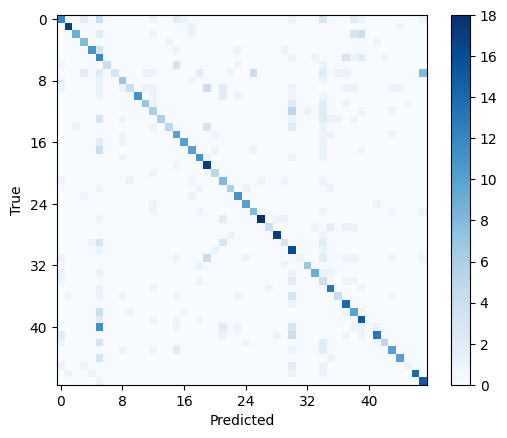

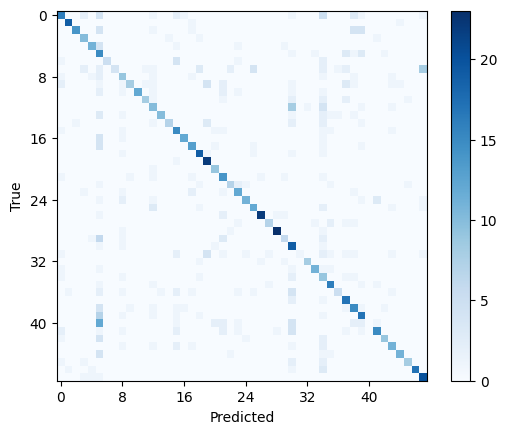

In [19]:
cm_val : np.ndarray = M1.get_confusion_matrix(Y_validation, pred=M1.get_prediction(X_validation))
plt.imshow(cm_val, cmap='Blues')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('True')
# plt.title('Confusion Matrix')
plt.xticks(range(0, cm_val.shape[0], 8))
plt.yticks(range(0, cm_val.shape[0], 8))
plt.show()
cm_test : np.ndarray = M1.get_confusion_matrix(Y_test, pred=M1.get_prediction(X_test))
plt.imshow(cm_test, cmap='Blues')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('True')
# plt.title('Confusion Matrix')
plt.xticks(range(0, cm_test.shape[0], 8))
plt.yticks(range(0, cm_test.shape[0], 8))
plt.show()